# 4.10 Coding Etiquette Reporting (Part 1)

### This script contains the following points:

### 1. Import Libraries

### 2. Import Dataset orders_product_customer_merge_sample.pkl

### 3. Address PII Data

### 4. Regional Segmentation

### 5. Spending Habits per Region

### 6. Remove Customers low Generating Customers

### 7.Customer Profiling

##### 7.1 Age

##### 7.2 Dependents

##### 7.3 Income

##### 7.4 Orders_day_of_week

### 8. Visualistion of Customer Profile Distribution

##### 8.1 Age

##### 8.2 Dependents

##### 8.3 Income

##### 8.4 Order_day_of_the_week

### 9. Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.













# 1. Import Libraries

In [89]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# 2. Import Dataset orders_product_customer_merge_sample.pkl

In [90]:
path = r'/content/drive/MyDrive/Careerfoundary'

In [91]:
df_ords_prods_cust_merge = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data','orders_product_customer_merge_sample.pkl'))

In [92]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [93]:
df_ords_prods_cust_merge.shape

(2771091, 34)

# 3. Address PII Data

Address any PII data for security reasons

In [94]:
df_ords_prods_cust_merge.columns

Index(['user_id', 'first_name', 'surname', 'gender', 'state', 'age',
       'date_joined', 'n_dependants', 'marital_status', 'income', 'order_id',
       'order_number', 'orders_day_of_week', 'order_hour_of_day',
       'days_since_prior_order', 'first_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', 'price_range_loc', 'busiest_day',
       'Busiest_Days(plural)', 'busiest_period_of_day', 'max_order',
       'loyalty_flag', 'mean_price', 'spending_flag', 'customer_frequency',
       'frequency_flag', '_merge'],
      dtype='object')

### To address the PII data I have decided to removed columns first_name and surname as these columns would make it easy to trace information back to a particular person.

In [95]:
df_ords_prods_cust_merge = df_ords_prods_cust_merge.drop(columns = ['first_name'])

In [96]:
df_ords_prods_cust_merge = df_ords_prods_cust_merge.drop(columns = ['surname'])

In [97]:
df_ords_prods_cust_merge.columns

Index(['user_id', 'gender', 'state', 'age', 'date_joined', 'n_dependants',
       'marital_status', 'income', 'order_id', 'order_number',
       'orders_day_of_week', 'order_hour_of_day', 'days_since_prior_order',
       'first_order', 'product_id', 'add_to_cart_order', 'reordered',
       'product_name', 'aisle_id', 'department_id', 'prices',
       'price_range_loc', 'busiest_day', 'Busiest_Days(plural)',
       'busiest_period_of_day', 'max_order', 'loyalty_flag', 'mean_price',
       'spending_flag', 'customer_frequency', 'frequency_flag', '_merge'],
      dtype='object')

In [98]:
# There are no other columns that would link back to a particular person.

# 4. Regional Segmentation

Compare customer behavior in different geographic areas. Create a regional segmentation of the data. You’ll need to create a “Region” column based on the “State” column from your customers data set.

In [99]:
# Get the count of each state
state_counts = df_ords_prods_cust_merge['state'].value_counts()

In [100]:
# Create a new DataFrame from the state_counts Series
state_counts_df = state_counts.reset_index()

In [101]:
# Rename the columns
state_counts_df.columns = ['state', 'count']

In [102]:
# Display the new DataFrame
print(state_counts_df)

                   state   count
0          New Hampshire  157107
1                   Iowa  153199
2                Arizona  104868
3   District of Columbia  104266
4                Vermont  103631
5                 Oregon  103226
6                  Idaho  102665
7         South Carolina  102006
8                Wyoming  101921
9                  Maine  101304
10                Hawaii  101292
11               Georgia  100334
12           Mississippi   99533
13                Kansas   98837
14        North Carolina   96863
15              Missouri   95711
16             Louisiana   53420
17           Connecticut   53391
18               Alabama   53094
19              Maryland   52234
20              Michigan   52109
21                Alaska   51850
22              Delaware   51469
23             Minnesota   50877
24            Washington   50250
25              Illinois   49694
26              Nebraska   49585
27          Rhode Island   49543
28             Tennessee   49370
29        

In [103]:
# Dervive a new column grouping states by region using Wikipedia using the loc method

In [104]:
#Group together states in the northeast
df_ords_prods_cust_merge.loc[df_ords_prods_cust_merge['state'].isin(['Maine', 'New Hampshire', 'Vermont', 'Massachusetts','Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']), 'region'] = 'northeast'

In [105]:
#Group together states in the midwest
df_ords_prods_cust_merge.loc[df_ords_prods_cust_merge['state'].isin(['Wisconsin', 'Michigan','Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']), 'region'] = 'midwest'

In [106]:
#Group together states in the south
df_ords_prods_cust_merge.loc[df_ords_prods_cust_merge['state'].isin(['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']), 'region'] = 'south'

In [107]:
#Group together states in the west
df_ords_prods_cust_merge.loc[df_ords_prods_cust_merge['state'].isin(['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']), 'region'] = 'west'

In [108]:
df_ords_prods_cust_merge['region'].value_counts(dropna = False)

region
south        855333
west         714256
midwest      690633
northeast    510869
Name: count, dtype: int64

In [109]:
df_ords_prods_cust_merge.columns

Index(['user_id', 'gender', 'state', 'age', 'date_joined', 'n_dependants',
       'marital_status', 'income', 'order_id', 'order_number',
       'orders_day_of_week', 'order_hour_of_day', 'days_since_prior_order',
       'first_order', 'product_id', 'add_to_cart_order', 'reordered',
       'product_name', 'aisle_id', 'department_id', 'prices',
       'price_range_loc', 'busiest_day', 'Busiest_Days(plural)',
       'busiest_period_of_day', 'max_order', 'loyalty_flag', 'mean_price',
       'spending_flag', 'customer_frequency', 'frequency_flag', '_merge',
       'region'],
      dtype='object')

# 5. Spending Habits per Region

Determine whether there’s a difference in spending habits between the different U.S. regions. (Hint: You can do this by crossing the variable you just created with the spending flag.)

In [110]:
crosstab = pd.crosstab(df_ords_prods_cust_merge['spending_flag'], df_ords_prods_cust_merge['region'], dropna=False)

In [111]:
print(crosstab)

region          midwest  northeast   south    west
spending_flag                                     
Higher Spender    13228       8049   14198   12729
Low Spender      677405     502820  841135  701527


In [112]:
# Across states there is a higher proportion of lower spenders than higher spender. The largest number of higher spenders reside in the midwest.

# 6. Remove Customers low Generating Customers

The Instacart CFO isn’t interested in customers who don’t generate much revenue for the app. Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data. Make sure you export this sample.

In [113]:
#Criteria of exclusion flag - customers with < 5 orders

In [114]:
#Create a new column low_activity_customers - customers with less than 5 orders will be excluded
df_ords_prods_cust_merge.loc[df_ords_prods_cust_merge['max_order'] < 5, 'customer_activity_flag'] = 'exclude'


In [115]:
#Create a new column low_activity_customers - customers with more than 5 orders will be kept
df_ords_prods_cust_merge.loc[df_ords_prods_cust_merge['max_order'] >= 5, 'customer_activity_flag'] = 'keep'

In [116]:
df_ords_prods_cust_merge['customer_activity_flag'].value_counts(dropna = False)

customer_activity_flag
keep       2648423
exclude     122668
Name: count, dtype: int64

In [117]:
df_ords_prods_cust_merge.head(5)

,user_id,gender,state,age,date_joined,n_dependants,marital_status,income,order_id,order_number,...,busiest_period_of_day,max_order,loyalty_flag,mean_price,spending_flag,customer_frequency,frequency_flag,_merge,region,customer_activity_flag
0,90,Female,Pennsylvania,60,3/25/2017,1,married,50952,28457,34,...,Most orders,42,Loyal customer,8.075028,Low Spender,8.0,Frequent customer,both,northeast,keep
1,90,Female,Pennsylvania,60,3/25/2017,1,married,50952,27429,12,...,Most orders,12,Regular customer,7.716068,Low Spender,11.0,Regular customer,both,northeast,keep
2,90,Female,Pennsylvania,60,3/25/2017,1,married,50952,3386,60,...,Most orders,84,Loyal customer,7.991170,Low Spender,4.0,Frequent customer,both,northeast,keep
3,90,Female,Pennsylvania,60,3/25/2017,1,married,50952,-5680,3,...,Most orders,44,Loyal customer,8.079674,Low Spender,7.0,Frequent customer,both,northeast,keep
4,90,Female,Pennsylvania,60,3/25/2017,1,married,50952,-28518,3,...,Most orders,5,New customer,6.124142,Low Spender,20.0,Regular customer,both,northeast,keep


In [118]:
# Check exclusion flag using crosstab
crosstab2 = pd.crosstab(df_ords_prods_cust_merge['customer_activity_flag'], df_ords_prods_cust_merge['max_order'], dropna = False)

In [119]:
# We can see below if the max orders is lower than 5 they fall into the exlude column, if they are more than 5 they fall into the keep column
crosstab2

max_order,3,4,5,6,7,8,9,10,11,12,...,90,91,92,93,94,95,96,97,98,99
customer_activity_flag,,,,,,,,,,,,,,,,,,,,,
exclude,57330,65338,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
keep,0,0,70544,69910,69255,68126,71178,65642,67750,61442,...,5211,6249,5285,4090,3386,5180,2639,2003,2342,104774


In [120]:
# Exclude the the low-activity customers from the dataframe
df_ords_prods_cust_merge_keep = df_ords_prods_cust_merge[df_ords_prods_cust_merge['customer_activity_flag'] == 'keep']

In [121]:
#We can see that we have the same number of row in this new database as the number of 'keep' rows from the customer_activity_flag
df_ords_prods_cust_merge_keep.shape

(2648423, 34)

In [122]:
# Export the new sample

# df_ords_prods_cust_merge_keep.to_pickle(os.path.join(path, '02 Data', 'Prepared Data','orders_product_customer_merge_sample_keep.pkl'))

# 7.Customer Profiling

The marketing and business strategy units at Instacart want to create more-relevant marketing strategies for different products and are, thus, curious about customer profiling in their database. Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents. You might also use the “orders_day_of_week” and “order_hour_of_day” columns if you can think of a way they would impact customer profiles. (Hint: As an example, try thinking of what characteristics would lead you to the profile “Single adult” or “Young parent.”)

In [123]:
df_ords_prods_cust_merge_keep.head(5)

,user_id,gender,state,age,date_joined,n_dependants,marital_status,income,order_id,order_number,...,busiest_period_of_day,max_order,loyalty_flag,mean_price,spending_flag,customer_frequency,frequency_flag,_merge,region,customer_activity_flag
0,90,Female,Pennsylvania,60,3/25/2017,1,married,50952,28457,34,...,Most orders,42,Loyal customer,8.075028,Low Spender,8.0,Frequent customer,both,northeast,keep
1,90,Female,Pennsylvania,60,3/25/2017,1,married,50952,27429,12,...,Most orders,12,Regular customer,7.716068,Low Spender,11.0,Regular customer,both,northeast,keep
2,90,Female,Pennsylvania,60,3/25/2017,1,married,50952,3386,60,...,Most orders,84,Loyal customer,7.991170,Low Spender,4.0,Frequent customer,both,northeast,keep
3,90,Female,Pennsylvania,60,3/25/2017,1,married,50952,-5680,3,...,Most orders,44,Loyal customer,8.079674,Low Spender,7.0,Frequent customer,both,northeast,keep
4,90,Female,Pennsylvania,60,3/25/2017,1,married,50952,-28518,3,...,Most orders,5,New customer,6.124142,Low Spender,20.0,Regular customer,both,northeast,keep


# 7.1 Age

Spliting the data by age will give us an insight into the spending habits of each group and if they differ from one group to another. Its important to note that the lower age range (young adult) and highest age range (senior) is significantly smaller than the other two age groups which mirrors USA census data - Statista 2022 data

In [124]:
df_ords_prods_cust_merge_keep['age'].describe()

count    2.648423e+06
mean     5.067818e+01
std      1.800330e+01
min      1.800000e+01
25%      3.300000e+01
50%      5.100000e+01
75%      6.500000e+01
max      8.000000e+01
Name: age, dtype: float64

In [125]:
#The minimum age is 18 and maximum ages is 80

In [126]:
#Criteria - we start the categories as 18years as we have identified this is the youngest customer age

# Young Adult - 18-25 Years Old
# Adult - 26 - 44 Years Old
# Older Adult - 45 - 64 Years Old
# Senior 65+

In [127]:
# Dervive a new column grouping ages together using the loc method

In [128]:
df_ords_prods_cust_merge_keep.loc[df_ords_prods_cust_merge_keep['age'] <= 25, 'age_group'] = 'Young Adult'


<ipython-input-128-82bebff52d97>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ords_prods_cust_merge_keep.loc[df_ords_prods_cust_merge_keep['age'] <= 25, 'age_group'] = 'Young Adult'


In [129]:
df_ords_prods_cust_merge_keep.loc[(df_ords_prods_cust_merge_keep['age'] > 25) & (df_ords_prods_cust_merge['age'] <= 44),
'age_group'] = 'Adult'

In [130]:
df_ords_prods_cust_merge_keep.loc[(df_ords_prods_cust_merge_keep['age'] > 44) & (df_ords_prods_cust_merge['age'] <= 64),
'age_group'] = 'Older Adult'

In [131]:
df_ords_prods_cust_merge_keep.loc[df_ords_prods_cust_merge_keep['age'] > 64, 'age_group'] = 'Senior'

In [132]:
df_ords_prods_cust_merge_keep['age_group'].value_counts(dropna = False)

age_group
Older Adult    998600
Adult          720872
Senior         686557
Young Adult    242394
Name: count, dtype: int64

# 7.2 Dependents

We will explore whether or not customers have dependants or not. This could be a factor that effects spending patterns and could be used for targeted marketing campaigns

```
# This is formatted as code
```



In [133]:
# We will derive a new column using the loc method

In [134]:
# Criteria
# 0 dependants 'no dependants'
# > 0 'dependents'

In [135]:
df_ords_prods_cust_merge_keep.loc[df_ords_prods_cust_merge_keep['n_dependants'] == 0, 'dependants_flag'] = 'No Dependants'

<ipython-input-135-3798cbe3924a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ords_prods_cust_merge_keep.loc[df_ords_prods_cust_merge_keep['n_dependants'] == 0, 'dependants_flag'] = 'No Dependants'


In [136]:
df_ords_prods_cust_merge_keep.loc[df_ords_prods_cust_merge_keep['n_dependants'] > 0, 'dependants_flag'] = 'Dependants'

In [137]:
#Check the the dependant_flag
df_ords_prods_cust_merge_keep['dependants_flag'].value_counts(dropna = False)

dependants_flag
Dependants       1881556
No Dependants     766867
Name: count, dtype: int64

# 7.3 Income

Income can greatly effect spending habit so its important to profile our customers to see if income effects spending patterns and the iteams customer group decided to spend on.


In [138]:
# According to the Census Bureau's Income in the United States 2022 report:

# Criteria
# Lower class: less than or equal to $30,000.00
# Lower-middle class: $30,001 – $58,020.00
# Median household income is $58,021.00 - $74,580.00
# Upper Class is $74,581.00 +

In [139]:
df_ords_prods_cust_merge_keep['income'].describe()

count    2.648423e+06
mean     9.774798e+04
std      3.622575e+04
min      3.054100e+04
25%      7.069900e+04
50%      9.917200e+04
75%      1.175720e+05
max      1.672930e+05
Name: income, dtype: float64

In [140]:
# We can see the Min Income is $30,541.00 and the Max Income is $167,293.00
# Therefore we do not have any customers in the lower class classification which unfortunatley means they are not represented in this sample.

In [141]:
df_ords_prods_cust_merge_keep.loc[df_ords_prods_cust_merge_keep['income'] <= 30000,'income_class'] = 'Lower Class Income'

<ipython-input-141-a1fd7c34a398>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ords_prods_cust_merge_keep.loc[df_ords_prods_cust_merge_keep['income'] <= 30000,'income_class'] = 'Lower Class Income'


In [142]:
df_ords_prods_cust_merge_keep.loc[(df_ords_prods_cust_merge_keep['income'] >= 30001) & (df_ords_prods_cust_merge['income'] <= 58020),
'income_class'] = 'Lower-Middle Class Income'

In [143]:
df_ords_prods_cust_merge_keep.loc[(df_ords_prods_cust_merge_keep['income'] >= 58021.00) & (df_ords_prods_cust_merge['income'] <= 74580),
'income_class'] = 'Median Class Income'

In [144]:
df_ords_prods_cust_merge_keep.loc[df_ords_prods_cust_merge_keep['income'] >= 74581,'income_class'] = 'Upper Class Income'

In [145]:
#check the new column
df_ords_prods_cust_merge_keep['income_class'].value_counts(dropna = False)

income_class
Upper Class Income           1835587
Lower-Middle Class Income     473226
Median Class Income           339610
Name: count, dtype: int64

# 7.4 Orders_day_of_week

The standard working week in the USA is Monday to Friday. We can split our order_days_per_week into working days(weekdays) vs non working days(weekends). we can later use this to see if there is more business on weekends or workdays depending on customer groups.

In [146]:
# Criteria (as stated on the project brief)
# 0 = Saturday
# 1 = Sunday
# 2 = Monday
# 3 = Tuesday
# 4 = Wednesday
# 5 = Thursday
# 6 = Friday


In [147]:
df_ords_prods_cust_merge_keep.columns

Index(['user_id', 'gender', 'state', 'age', 'date_joined', 'n_dependants',
       'marital_status', 'income', 'order_id', 'order_number',
       'orders_day_of_week', 'order_hour_of_day', 'days_since_prior_order',
       'first_order', 'product_id', 'add_to_cart_order', 'reordered',
       'product_name', 'aisle_id', 'department_id', 'prices',
       'price_range_loc', 'busiest_day', 'Busiest_Days(plural)',
       'busiest_period_of_day', 'max_order', 'loyalty_flag', 'mean_price',
       'spending_flag', 'customer_frequency', 'frequency_flag', '_merge',
       'region', 'customer_activity_flag', 'age_group', 'dependants_flag',
       'income_class'],
      dtype='object')

In [148]:
df_ords_prods_cust_merge_keep.loc[df_ords_prods_cust_merge_keep['orders_day_of_week'].isin([0, 1]), 'order_day_type'] = 'Non-working day - weekend'

<ipython-input-148-5efed5d9494b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ords_prods_cust_merge_keep.loc[df_ords_prods_cust_merge_keep['orders_day_of_week'].isin([0, 1]), 'order_day_type'] = 'Non-working day - weekend'


In [149]:
df_ords_prods_cust_merge_keep.loc[df_ords_prods_cust_merge_keep['orders_day_of_week'].isin([2, 3, 4, 5, 6]), 'order_day_type'] = 'Working days -weekdays'

In [150]:
#Check the new column
df_ords_prods_cust_merge_keep['order_day_type'].value_counts(dropna = False)

order_day_type
Working days -weekdays       1680920
Non-working day - weekend     967503
Name: count, dtype: int64

# 8. Visualisation of Customer Profile Distribution

Create an appropriate visualization to show the distribution of profiles.

# 8.1 - Age

We have decided to display the ages groups of the customers on a piechart as this is a clear way to dispay each age group as a proportion of the  total of all customers.

In [151]:
## First, create a table of age_group sets
age_group_set = df_ords_prods_cust_merge_keep['age_group'].value_counts()

Text(0.5, 1.0, 'Instacart Distribution of Customers by Age Group')

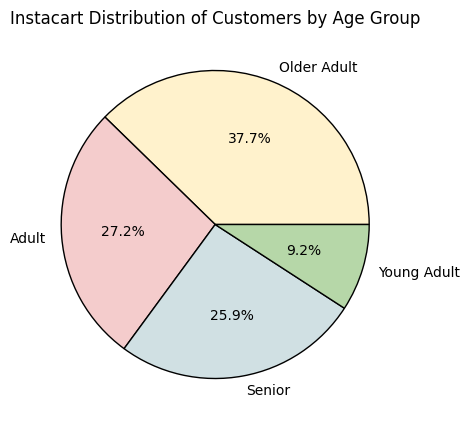

In [152]:
#Create the piechart
plt.figure(figsize=(5, 5)) # Size of the piechart

plt.pie(age_group_set,
        labels=age_group_set.index,
        autopct='%.1f%%', # Show percentage to 1 decimal place
        colors=['#fff2cc', '#f4cccc', '#d0e0e3', '#b6d7a8'], # Color palette
        wedgeprops={'edgecolor': 'black'}) # properties of the pie chart slices, in this case, adding a black border around each slice.

plt.title('Instacart Distribution of Customers by Age Group') # title

We can clearly see that our largest customer base is Older Adults --> 45 - 64 Years Old

# 8.2 Dependents

We have decided to display these results on a bar chart.

In [153]:
# Use a sample of only the columns needed
sample = df_ords_prods_cust_merge_keep[['dependants_flag']]

Text(0.5, 1.0, 'InstaCart Customers With or Without Dependants')

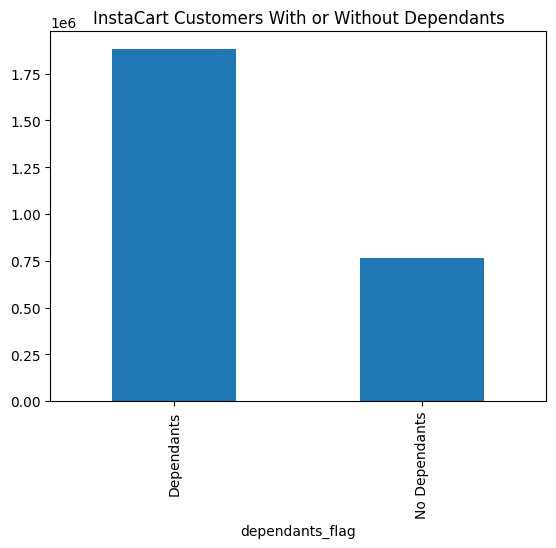

In [154]:
bar = sample['dependants_flag'].value_counts().plot.bar()
plt.title('InstaCart Customers With or Without Dependants')

We can clearly see that we have more customers with dependants than without. This can also be seen in the breakdown below.

In [155]:
df_ords_prods_cust_merge_keep['dependants_flag'].value_counts(dropna = False)

dependants_flag
Dependants       1881556
No Dependants     766867
Name: count, dtype: int64

# 8.3 Income

We have decided to display income in a pie chart where we can easy see the percentage of our customers in each income bracket.

In [156]:
# First, create a table

income_set = df_ords_prods_cust_merge_keep['income_class'].value_counts()

Text(0.5, 1.0, 'Instacart Customer Income Categories')

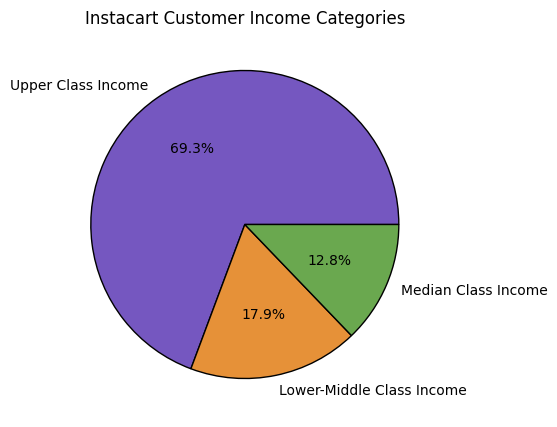

In [157]:
#Create the piechart
plt.figure(figsize=(5, 5)) # Size of the piechart

plt.pie(income_set,
        labels=income_set.index,
        autopct='%.1f%%', # Show percentage to 1 decimal place
        colors=['#7557c0', '#e69138', '#6aa84f'], # Color palette
        wedgeprops={'edgecolor': 'black'}) # properties of the pie chart slices, in this case, adding a black border around each slice.

plt.title('Instacart Customer Income Categories') # title

We have the largest porportion in the upper class group meaning we have a higher proportion of customers that would be classed in the Upper Class income group according to the Census Bureau's Income in the United States 2022.

# 8.4 Order_day_of_the_week

We have decided to display the working days of the week orders vs non working days of the week results in a pie chart. This way we can easily see if there was business during the week vs the weekend.

In [158]:
## First, create a table of order_day_type
order_day_type_set = df_ords_prods_cust_merge_keep['order_day_type'].value_counts()


Text(0.5, 1.0, 'Instacart Customer Orders - Weekend VS Weekdays')

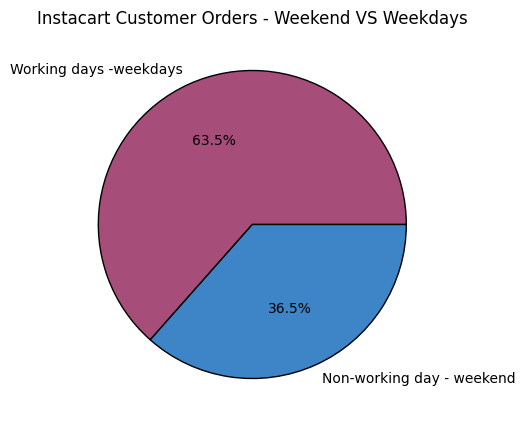

In [159]:
#Create the piechart
plt.figure(figsize=(5, 5)) # Size of the piechart

plt.pie(order_day_type_set,
        labels=order_day_type_set.index,
        autopct='%.1f%%', # Show percentage to 1 decimal place
        colors=['#a64d79', '#3d85c6'], # Color palette
        wedgeprops={'edgecolor': 'black'}) # properties of the pie chart slices, in this case, adding a black border around each slice.

plt.title('Instacart Customer Orders - Weekend VS Weekdays') # title

More orders were placed during the week (working days) compared to the weekend (non- working days). This will need to be investigated further.

# 9. Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

**To find usage frequency we will look at the column days_since_prior - which records the day since a customer last order**


**To find the expenditure we need to find an order total per order_id**

In [160]:
# We need to aggregate the order_id columns and other associated columns so we are able to condense the data to complete information per order_id.

# From there we can aggreate the prices column to represent total orders per order_id

In [161]:
# We will create a new aggregated dataframe where prices are sumed together to give the expenditure per order_id

In [162]:
df_ords_prods_cust_merge_keep.columns

Index(['user_id', 'gender', 'state', 'age', 'date_joined', 'n_dependants',
       'marital_status', 'income', 'order_id', 'order_number',
       'orders_day_of_week', 'order_hour_of_day', 'days_since_prior_order',
       'first_order', 'product_id', 'add_to_cart_order', 'reordered',
       'product_name', 'aisle_id', 'department_id', 'prices',
       'price_range_loc', 'busiest_day', 'Busiest_Days(plural)',
       'busiest_period_of_day', 'max_order', 'loyalty_flag', 'mean_price',
       'spending_flag', 'customer_frequency', 'frequency_flag', '_merge',
       'region', 'customer_activity_flag', 'age_group', 'dependants_flag',
       'income_class', 'order_day_type'],
      dtype='object')

In [163]:
# Search for missing values
df_ords_prods_cust_merge_keep.isnull(). sum()

user_id                        0
gender                         0
state                          0
age                            0
date_joined                    0
n_dependants                   0
marital_status                 0
income                         0
order_id                       0
order_number                   0
orders_day_of_week             0
order_hour_of_day              0
days_since_prior_order    141944
first_order                    0
product_id                     0
add_to_cart_order              0
reordered                      0
product_name                   0
aisle_id                       0
department_id                  0
prices                       367
price_range_loc                0
busiest_day                    0
Busiest_Days(plural)           0
busiest_period_of_day          0
max_order                      0
loyalty_flag                   0
mean_price                     0
spending_flag                  0
customer_frequency             0
frequency_

In [164]:
# I have 367 null prices in my dataframe, I have decided to make them 0 instead of exlcuding them as I can still us the information in the other columns.

In [165]:
df_ords_prods_cust_merge_keep.shape

(2648423, 38)

In [166]:
# Change all missing prices to 0
df_ords_prods_cust_merge_keep['prices'] = df_ords_prods_cust_merge_keep['prices'].fillna(0)

<ipython-input-166-b1698b6a1750>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ords_prods_cust_merge_keep['prices'] = df_ords_prods_cust_merge_keep['prices'].fillna(0)


In [167]:
df_ords_prods_cust_merge_keep.shape

(2648423, 38)

In [168]:
df_ords_prods_cust_merge_keep.isnull(). sum()

user_id                        0
gender                         0
state                          0
age                            0
date_joined                    0
n_dependants                   0
marital_status                 0
income                         0
order_id                       0
order_number                   0
orders_day_of_week             0
order_hour_of_day              0
days_since_prior_order    141944
first_order                    0
product_id                     0
add_to_cart_order              0
reordered                      0
product_name                   0
aisle_id                       0
department_id                  0
prices                         0
price_range_loc                0
busiest_day                    0
Busiest_Days(plural)           0
busiest_period_of_day          0
max_order                      0
loyalty_flag                   0
mean_price                     0
spending_flag                  0
customer_frequency             0
frequency_

In [169]:
df_ords_prods_cust_merge_keep.dtypes

user_id                      int64
gender                    category
state                     category
age                          int64
date_joined                 object
n_dependants                 int64
marital_status            category
income                       int64
order_id                     int16
order_number                  int8
orders_day_of_week            int8
order_hour_of_day             int8
days_since_prior_order     float64
first_order               category
product_id                   int16
add_to_cart_order             int8
reordered                     int8
product_name                object
aisle_id                     int32
department_id                int32
prices                     float16
price_range_loc             object
busiest_day               category
Busiest_Days(plural)      category
busiest_period_of_day       object
max_order                    int64
loyalty_flag              category
mean_price                 float32
spending_flag       

In [170]:
df_ords_prods_cust_merge_keep['prices'] = pd.to_numeric(df_ords_prods_cust_merge_keep['prices'], errors = 'coerce')

<ipython-input-170-415ffd4b699d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ords_prods_cust_merge_keep['prices'] = pd.to_numeric(df_ords_prods_cust_merge_keep['prices'], errors = 'coerce')


# Export Data Frame to new Script (RAM issue)

In [171]:
df_ords_prods_cust_merge_keep.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'df_ords_prods_cust_merge_keep.pkl'))